In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import time, sys
from IPython.display import clear_output, display
from time import sleep
import random
from tabulate import tabulate

In [2]:
%run -i ./Classes.ipynb

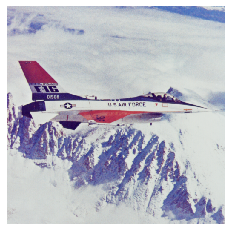

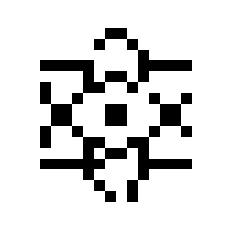

In [3]:
# Load
ori_img = cv2.imread('./assets/airplane.png') #BGR
ori_logo = cv2.imread('./assets/atom.png', 0)

image_size = 512
logo_size = 20
q_step = 0.2
tf_step = 24

# Initialize
my_image = Image(ori_img, image_size)
my_logo = Logo(ori_logo, logo_size)

ImageUtil.show1(my_image.image, '', 4)
ImageUtil.show1(my_logo.logo, '', 4)

# Embedding

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

PSNR = 36.82200469676255


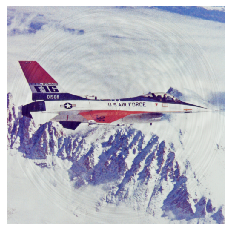

In [4]:
# Watermarker
riw = RIW(image_size, logo_size, logo_size * 2, q_step, tf_step)

# Embed
img_y_watermarked = riw.embed(my_image.get_y(), my_logo.logo)

w_image = Image.copy(my_image)
w_image.set_y(img_y_watermarked)

print('PSNR = {}'.format(ImageUtil.psnr(my_image.image, w_image.image)))

ImageUtil.show1(w_image.image, '')

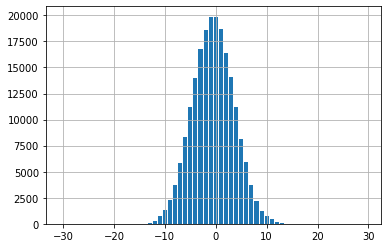

In [5]:
# Histogram of Compensation Image

fig_histogram = plt.figure()
histogram_data = riw.img_compensation.flatten()
histogram_data = histogram_data[histogram_data != 0]
(yaxis, xaxis) = np.histogram(histogram_data, bins=np.linspace(-30, 30, 61))
xaxis = xaxis[0:len(yaxis)]
plt.bar(xaxis, yaxis)
plt.grid()
plt.show()

'Transform PCET: [####################] 100.0%'

BER = 0.00%


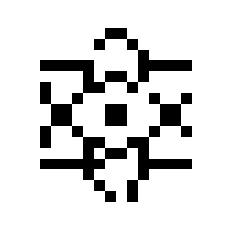

In [6]:
logo_no_attack = riw.extract(w_image.get_y())

print('BER = {:.2%}'.format(ImageUtil.ber(my_logo.logo, logo_no_attack)))

ImageUtil.show1(logo_no_attack, '')

# Signal Processing Attack

'Transform PCET: [####################] 100.0%'

BER = 0.00%


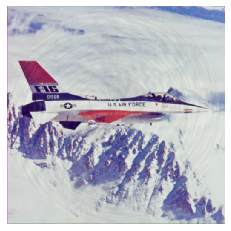

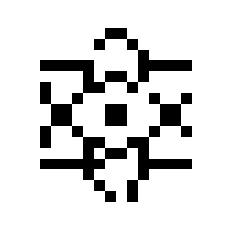

In [8]:
# Filter Gauss

image_filter_gauss = Image(Attacker.filter_gauss(w_image.image, 3), image_size)

logo_filter_gauss = riw.extract(image_filter_gauss.get_y())

print('BER = {:.2%}'.format(ImageUtil.ber(my_logo.logo, logo_filter_gauss)))

ImageUtil.show1(image_filter_gauss.image, '')
ImageUtil.show1(logo_filter_gauss, '')

'Transform PCET: [####################] 100.0%'

BER = 1.00%


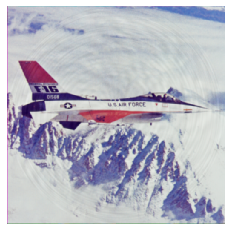

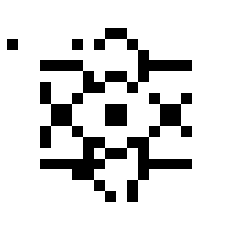

In [9]:
# Filter Average

image_filter_average = Image(Attacker.filter_average(w_image.image, 3), image_size)

logo_filter_average = riw.extract(image_filter_average.get_y())

print('BER = {:.2%}'.format(ImageUtil.ber(my_logo.logo, logo_filter_average)))

ImageUtil.show1(image_filter_average.image, '')
ImageUtil.show1(logo_filter_average, '')

'Transform PCET: [####################] 100.0%'

BER = 0.00%


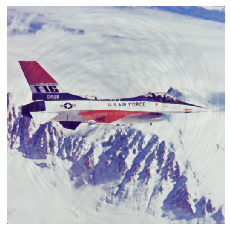

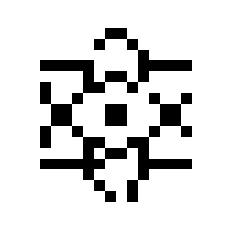

In [10]:
# Filter Median

image_filter_median = Image(Attacker.filter_median(w_image.image, 3), image_size)

logo_filter_median = riw.extract(image_filter_median.get_y())

print('BER = {:.2%}'.format(ImageUtil.ber(my_logo.logo, logo_filter_median)))

ImageUtil.show1(image_filter_median.image, '')
ImageUtil.show1(logo_filter_median, '')

'Transform PCET: [####################] 100.0%'

BER = 5.00%


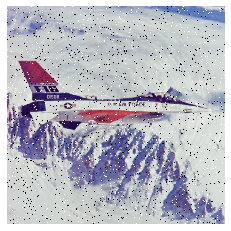

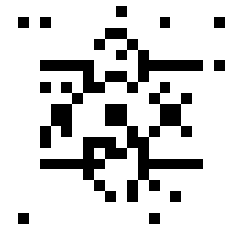

In [11]:
# Filter Noise Salat & Paper

image_noise_sp = Image(Attacker.noise_salt_pepper(w_image.image, 0.03), image_size)

logo_noise_sp = riw.extract(image_noise_sp.get_y())

print('BER = {:.2%}'.format(ImageUtil.ber(my_logo.logo, logo_noise_sp)))

ImageUtil.show1(image_noise_sp.image, '')
ImageUtil.show1(logo_noise_sp, '')

'Transform PCET: [####################] 100.0%'

BER = 8.50%


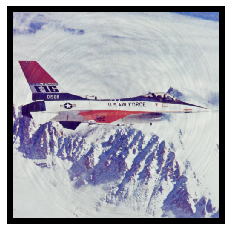

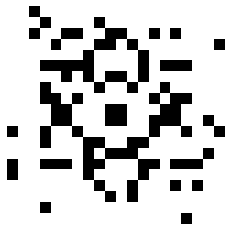

In [12]:
# Crop

image_crop = Image(Attacker.crop(w_image.image, 0.03, 0.03, 0.03, 0.03), image_size)

logo_crop = riw.extract(image_crop.get_y())

print('BER = {:.2%}'.format(ImageUtil.ber(my_logo.logo, logo_crop)))

ImageUtil.show1(image_crop.image, '')
ImageUtil.show1(logo_crop, '')

'Transform PCET: [####################] 100.0%'

BER = 0.00%


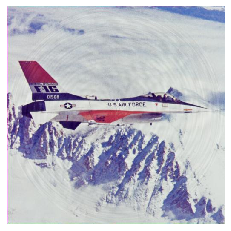

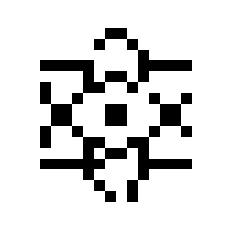

In [13]:
# JPEG Compression

image_jpeg = Image(Attacker.jpeg_compress(w_image.image, 75), image_size)

logo_jpeg = riw.extract(image_jpeg.get_y())

print('BER = {:.2%}'.format(ImageUtil.ber(my_logo.logo, logo_jpeg)))

ImageUtil.show1(image_jpeg.image, '')
ImageUtil.show1(logo_jpeg, '')

# Geometric Attack

'Transform PCET: [####################] 100.0%'

BER = 0.00%


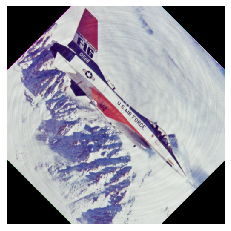

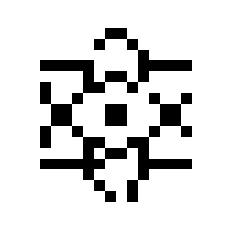

In [14]:
# Rotate

image_rotate = Image(Attacker.rotate(w_image.image, -45), image_size)

logo_rotate = riw.extract(image_rotate.get_y())

print('BER = {:.2%}'.format(ImageUtil.ber(my_logo.logo, logo_rotate)))

ImageUtil.show1(image_rotate.image, '')
ImageUtil.show1(logo_rotate, '')

'Transform PCET: [####################] 100.0%'

BER = 0.00%


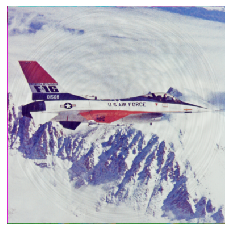

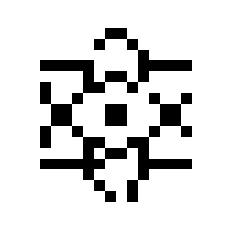

In [15]:
# Resize

new_image_size = 384
image_resize = Image(Attacker.resize(w_image.image, new_image_size), new_image_size)

riw_for_resize = RIW(new_image_size, logo_size, logo_size * 2, 0.2, 24)
logo_resize = riw_for_resize.extract(image_resize.get_y())

print('BER = {:.2%}'.format(ImageUtil.ber(my_logo.logo, logo_resize)))

ImageUtil.show1(image_resize.image, '')
ImageUtil.show1(logo_resize, '')

# Translation

In [16]:
def attack_translate_with_frame(image, dx, dy):
    (h, w, c) = image.shape
    
    frame = np.zeros((h + np.abs(dy), w + np.abs(dx), c)).astype('uint8')
    start_x = np.max([0, dx])
    start_y = np.max([0, dy])
    frame[start_y:start_y+h, start_x:start_x+w, :] = image
    return frame

def image_trim(image, image_size, cx, cy, cs):
    (h, w, c) = image.shape
    new_size = int(h * cs)
    if(new_size % 2 == 1):
        new_size = new_size + 1
    new_image = Attacker.resize(image, new_size)
    new_image = Attacker.translate_by_pixel(new_image, cx, cy)
    
    half_size = int(image_size / 2)
    center = int(new_size / 2)
    
    return new_image[center-half_size:center+half_size, center-half_size:center+half_size, :]

'Calculate Center: [####################] 100.0%'

Translation = 52
cx = -26, cy = -26, cs = 1


'Transform PCET: [####################] 100.0%'

BER = 0.00%


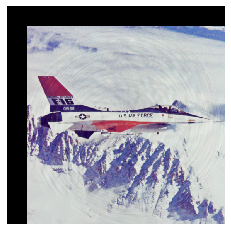

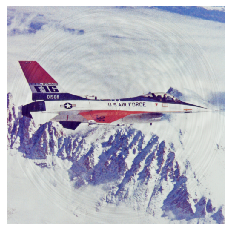

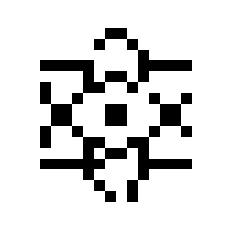

In [19]:
# Translate 2

tr = 0.10
trx = int(tr * image_size)
if(trx % 2 == 1):
    trx = trx + 1
tr_image = Image(attack_translate_with_frame(w_image.image, trx, trx), image_size + np.abs(trx))

(cx, cy, cs) = AntiTranslation2.calculate_center(w_image.image, tr_image.image)
c_image = Image(image_trim(tr_image.image, image_size, cx, cy, cs), image_size)

print("Translation = {}".format(trx))
print("cx = {}, cy = {}, cs = {}".format(cx, cy, cs))

logo_translate = riw.extract(c_image.get_y())

print('BER = {:.2%}'.format(ImageUtil.ber(my_logo.logo, logo_translate)))

ImageUtil.show1(tr_image.image, '')
ImageUtil.show1(c_image.image, '')
ImageUtil.show1(logo_translate, '')

'Calculate Center: [####################] 100.0%'

Translation = 6
cx = -6, cy = -6, cs = 1


'Transform PCET: [####################] 100.0%'

BER = 15.00%


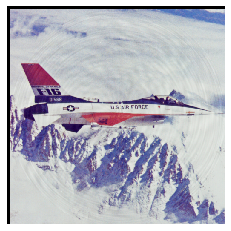

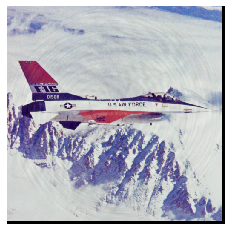

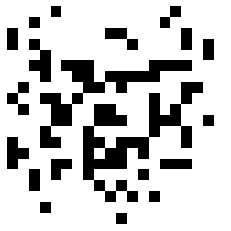

In [20]:
# Translate 1

tr_2 = 0.01
trx_2 = int(tr_2 * image_size)
if(trx_2 % 2 == 1):
    trx_2 = trx_2 + 1
image_translate = Image(Attacker.translate_by_pixel(w_image.image, trx_2, trx_2), image_size)

(cx_2, cy_2, cs_2) = AntiTranslation2.calculate_center(w_image.image, image_translate.image)
c_image_2 = Image(Attacker.translate_by_pixel(image_translate.image, cx_2, cy_2), image_size)

print("Translation = {}".format(trx_2))
print("cx = {}, cy = {}, cs = {}".format(cx_2, cy_2, cs_2))

logo_translate_2 = riw.extract(c_image_2.get_y())

print('BER = {:.2%}'.format(ImageUtil.ber(my_logo.logo, logo_translate_2)))

ImageUtil.show1(image_translate.image, '')
ImageUtil.show1(c_image_2.image, '')
ImageUtil.show1(logo_translate_2, '')